In [3]:
import pandas as pd
import numpy as np
import plotnine as pn
from scipy.stats import invgamma, multivariate_normal


In [10]:
# Constants
np.random.seed(123)
k = 1000
data_in = np.array([np.random.normal(size = k, loc = 100, scale = 20), 
                    np.random.normal(size = k, loc = 1000, scale = 133)]).T
data_in = pd.DataFrame({'x':data_in[:,0], 'y':data_in[:,1]})
data_in.to_csv('/Users/joshuahtouyz/Desktop/Upskill/workshops_online/1_Bayesian_modeling/Code/p3_mcmc/data_ads.csv', index = False)

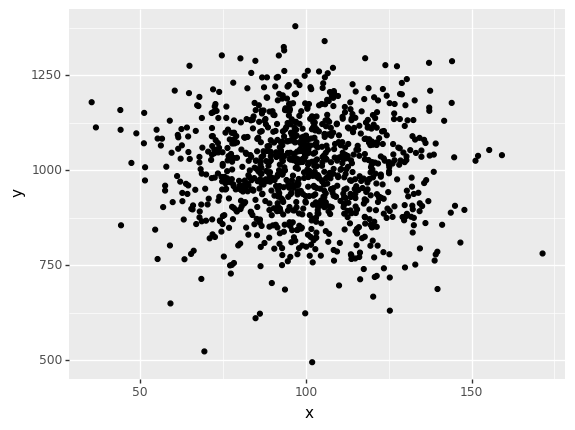

&lt;ggplot: (331202866)&gt;

In [11]:
# Read in data and visualize output
data_in = pd.read_csv('data_ads.csv')
pn.ggplot(pn.aes(x = 'x', y = 'y'), data = data_in) + pn.geom_point()

In [14]:
# Constants - Metropolis
iter_m = 10000
mu_post = np.ones([iter_m, 2])
mu_0 = np.array([100,100])
Sigma_0 = np.array([[1000,0],[0,1000]])
var1_fixed = np.var(data_in.x)
var2_fixed = np.var(data_in.y)

Sigma_proposal = [[10, 0], [0, 10]]  # Diagonal covariance
Sigma = np.array([[var1_fixed, 0],[0,var2_fixed]])
Sigma_inv = np.linalg.inv(Sigma)

In [25]:
data_in=np.array(data_in)

In [29]:
np.trace((data_in).dot(Sigma_inv).dot(data_in.T))

88301.38621648483

In [41]:


# Util function
mvnorm = lambda mu_vec: multivariate_normal.rvs(mean = mu_vec, cov = Sigma_proposal, size = 1)
runif = lambda: np.random.uniform(size = 1)
log_pdf_n = lambda v_in, mu_in, cov_in: multivariate_normal.logpdf(v_in, mean=mu_in, cov=cov_in)
log_acceptance = lambda mu_in: - log_pdf_n(x,mu_star,Sigma) - log_pdf_n(mu_star,mu_0,Sigma_0)


mu_post[0,:] = np.array([np.mean(x[:,0],np.mean(x[:,1])])
# -- Generating a 2d sample using Metropolis ---
for i in np.arange(0,n):

  # Generating new value
  if i == 0: # First iteration
    x_old = x_0
  
  # Propose next step
  pertubation = mvnorm(proposal_mu, proposal_Sigma, 1)
  x_new = x_old + pertubation[0]

# Update step value
  # Acceptance criteria
  log_alpha = log_density(x_new) - log_density(x_old)
  
  if(log_alpha > 0): # Move to area of higher probability
    x_old = x_new 
  else:
    U = np.random.uniform(0,1,1)[0]
    log_U = np.log(U)  
    if (log_U <= log_alpha): # Same U <= alpha <-> log_U <= log_alpha
      x_old = x_new # Move to area of higher probability
    else:
      pass # Keep old value
  
  # Update sampler
  samples[i,] = x_old

# --- Convert to pandas ---
samples = pd.DataFrame(samples)
samples.columns = ['x','y']

# --- Plotting MCMC chain ---
plot_out = pn.ggplot(pn.aes(x = 'x', y = 'y'),data = samples)\
+ pn.geom_point(alpha =0.5)
print(plot_out)


In [42]:
log_acceptance(np.array([1,1]),1)

array([[-52.89286645, -42.41812583, -59.03293936, ..., -63.47829466,
        -44.16259104, -44.59695573],
       [-42.41812583, -40.52898326, -47.52054083, ..., -57.49722299,
        -37.25837837, -36.01543437],
       [-59.03293936, -47.52054083, -65.89066582, ..., -71.02763797,
        -49.33963993, -49.78085198],
       ...,
       [-63.47829466, -57.49722299, -71.02763797, ..., -82.85186969,
        -54.86472057, -53.77547725],
       [-44.16259104, -37.25837837, -49.33963993, ..., -54.86472057,
        -37.39417392, -37.30676913],
       [-44.59695573, -36.01543437, -49.78085198, ..., -53.77547725,
        -37.30676913, -37.61182961]])

In [61]:
(x[0:2,:]-np.array([1,1])).dot( Sigma_inv).dot((x[0:2,:]-np.array([1,1])).T)

array([[52.89286645, 42.41812583],
       [42.41812583, 40.52898326]])

In [52]:
 (x-mu_star).

NameError: name 'mu_star' is not defined